In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [14]:
from data_structures.trees import *
from data_structures.cfr_trees import CFRTree
from cfr_code.reconstruction_cfr import SolveWithReconstructionCFR
from cfr_code.sample_cfr import SolveWithSampleCFR
from cfr_code.cfr import SolveWithCFR
from utilities.graphs import epsilon_graph, comparative_epsilon_graph
import time
from random import randint

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
n_players = 4
branching_factor = 2
depth = 8
iset_prob = 0.5
n_runs = 25
iterations = 250

t = randomTree(depth, branching_factor, iset_prob, n_players)
print("Size = " + str(t.node_count) + " nodes")

Size = 511 nodes


--------------- Run 0 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
Run in 11.256940841674805 seconds
--------------- Run 1 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 2 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 3 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
Run in 10.830628395080566 seconds
--------------- Run 4 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
Run in 11.860481262207031 seconds
--------------- Run 5 ---------------
--------------- RCFR ---------------
--------------- SCFR ----

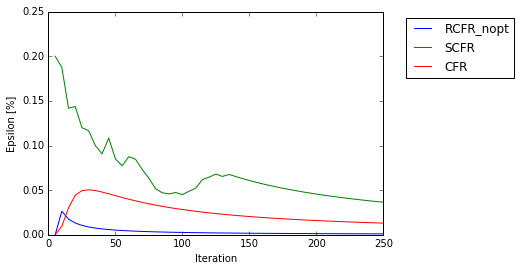

Run in 12.038380146026611 seconds
--------------- Run 8 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 9 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------


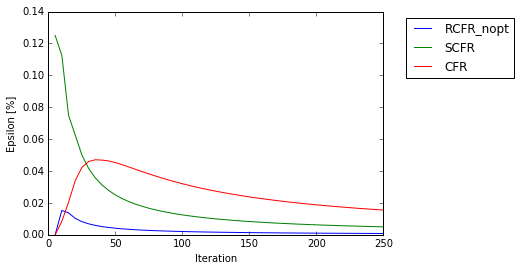

Run in 12.570645332336426 seconds
--------------- Run 10 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 11 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
Run in 12.227917909622192 seconds
--------------- Run 12 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 13 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
Run in 12.967998027801514 seconds
--------------- Run 14 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------


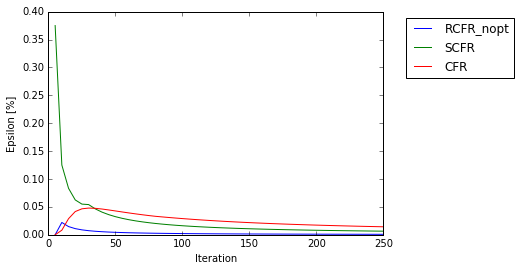

Run in 17.14952540397644 seconds
--------------- Run 15 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 16 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 17 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
Run in 12.237200736999512 seconds
--------------- Run 18 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 19 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
Run in 12.391936779022217 seconds
--------------- Run 20 ---------------
--------------- RCFR -------

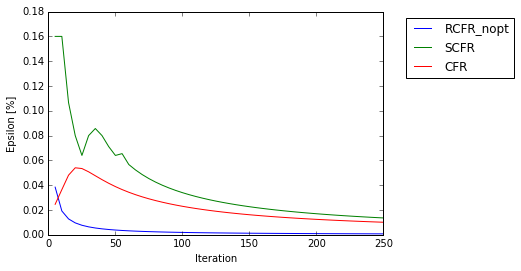

Run in 11.739381551742554 seconds
--------------- Run 21 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 22 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 23 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
RCFR epsilon was almost zero
--------------- Run 24 ---------------
--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------
Run in 16.27645182609558 seconds


In [33]:
all_trees = []
all_results = []
all_params = []

for run in range(n_runs):
    start_time = time.time()
    
    utility_params = [[randint(-2, 2) for _ in range(branching_factor)] for _ in range(branching_factor)]
    for i in range(branching_factor):
        if utility_params[i][i] > 0:
            utility_params[i][i] = -utility_params[i][i]
    
    t = build_permutation_game_tree(n_players, branching_factor, utility_params)
    all_trees.append(t)
    
    print("--------------- Run " + str(run) + " ---------------")
    
    rs = []
    print("--------------- RCFR ---------------")
    ct = CFRTree(t)
    rs.append(SolveWithReconstructionCFR(ct, iterations, reconstructEveryIteration = 5,
                                     reconstructWithOptimalPlan = False, checkEveryIteration = 5))
    print("--------------- SCFR ---------------")
    ct = CFRTree(t)
    rs.append(SolveWithSampleCFR(ct, iterations, checkEveryIteration = 5))
    print("--------------- CFR ---------------")
    ct = CFRTree(t)
    rs.append(SolveWithCFR(ct, iterations, checkEveryIteration = 5))
              
    leaves = set()
    ct.root.find_terminals(leaves)
    min_u = min(leaves, key = lambda n: n.utility[0]).utility
    max_u = max(leaves, key = lambda n: n.utility[0]).utility
    delta_utility = max_u[0] - min_u[0]
    
    all_params.append({'utility_params': utility_params, 'delta_utility': delta_utility,
                       'max_social_welfare': sum(max_u)})
              
    rcfr_final_epsilon = -min(rs[0]["graph_data"][-1:][0]["epsilon"]) / delta_utility
    cfr_final_epsilon = -min(rs[2]["graph_data"][-1:][0]["epsilon"]) / delta_utility
    
    if rcfr_final_epsilon <= 1e-8:
        print("RCFR epsilon was almost zero")
        continue
    if cfr_final_epsilon <= 1e-8:
        print("CFR epsilon was almost zero")
        continue
    
    rcfr_final_sw = sum(rs[0]["graph_data"][-1:][0]["utility"])
    cfr_final_sw = sum(rs[2]["graph_data"][-1:][0]["utility"])

    if rcfr_final_epsilon < cfr_final_epsilon / 10:
        comparative_epsilon_graph(rs, delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'])
    if abs(rcfr_final_sw - cfr_final_sw) > 0.1:
        comparative_epsilon_graph(rs, delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                                  yaxis = 'social_welfare', max_social_welfare = sum(max_u))
    all_results.append(rs)
    
    print("Run in " + str(time.time() - start_time) + " seconds")

--------------- RCFR ---------------
--------------- SCFR ---------------
--------------- CFR ---------------


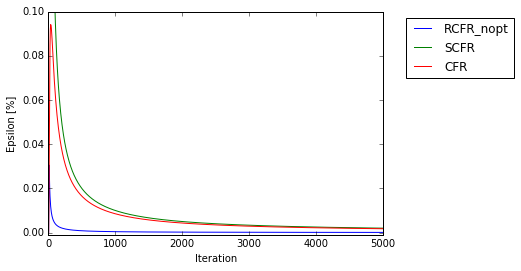

In [36]:
t = all_trees[9]

rs = []
print("--------------- RCFR ---------------")
ct = CFRTree(t)
rs.append(SolveWithReconstructionCFR(ct, 5000, reconstructEveryIteration = 5,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 5))
print("--------------- SCFR ---------------")
ct = CFRTree(t)
rs.append(SolveWithSampleCFR(ct, 5000, checkEveryIteration = 5))
print("--------------- CFR ---------------")
ct = CFRTree(t)
rs.append(SolveWithCFR(ct, 5000, checkEveryIteration = 5))

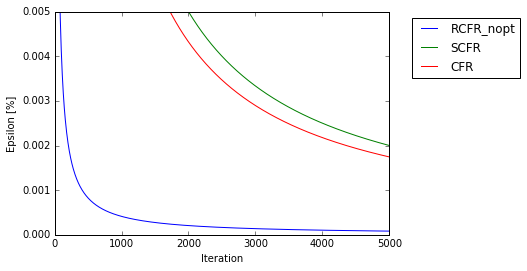

In [40]:
comparative_epsilon_graph(rs, delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (0, 0.005))

In [43]:
r = -min(rs[0]["graph_data"][-1]['epsilon'])
c = -min(rs[2]["graph_data"][-1]['epsilon'])
(r, c, c / r)

(0.0003301839925722305, 0.006976362061293706, 21.128710713520032)